In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation,rc
from IPython.display import HTML
from scipy.ndimage.interpolation import shift
rc('animation', html='html5')

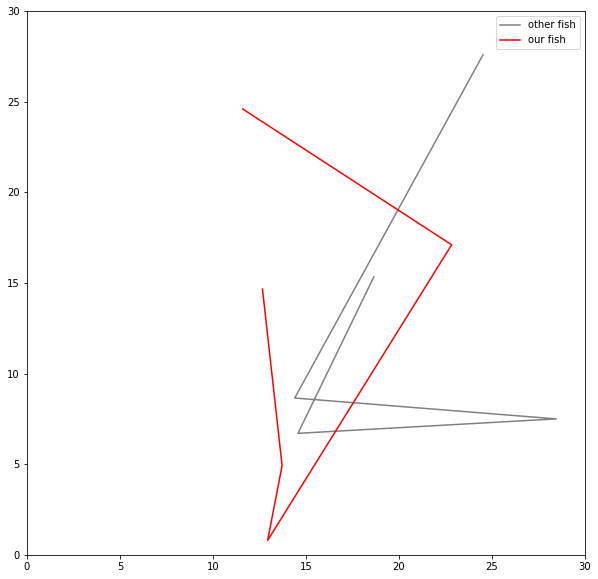

In [2]:
def add_to_buffer(buffer, value):
    buffer_local = np.roll(buffer, shift=-1)
    buffer_local[-1] = value
    np.copyto(dst=buffer, src=buffer_local)
    return buffer

fig = plt.figure(figsize=(10,10))
ax = plt.axes(xlim=(0, 30), ylim=(0, 30))

visible_steps = 5
past_x0 = np.zeros(visible_steps)
past_y0 = np.zeros(visible_steps)
past_x1 = np.zeros(visible_steps)
past_y1 = np.zeros(visible_steps)

lines0, = ax.plot([], [], c='grey', label='other fish')
lines1, = ax.plot([], [], c='red', label='our fish')

ax.legend(loc='upper right')

def init():
    lines0.set_data([], [])
    lines1.set_data([], [])    
    return lines0, lines1, 
    
def animate(i):
    x0, y0, x1, y1 = np.random.uniform(0, 30, size=4)
    
    add_to_buffer(past_x0, x0)
    add_to_buffer(past_y0, y0)
    
    add_to_buffer(past_x1, x1)
    add_to_buffer(past_y1, y1)    
    
    lines0.set_data(past_x0, past_y0)
    lines1.set_data(past_x1, past_y1)
    
    return lines0, lines1,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=50, blit=True)
anim